Medical Inventory Optimization

In [47]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
import mysql.connector
import seaborn as sns
import csv
import scipy.stats as stats
import pylab
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
from math import sqrt

In [73]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="127.0.0.1",
    database="medical",
    user="root",
    password="Tamilan@24")

In [ ]:
with conn.cursor() as cur:
    cur.execute("SELECT * FROM `medical inventory optimaization dataset_final`")
    rows = cur.fetchall()

In [50]:
for row in rows:
    print(row)
medical_data = pd.DataFrame(rows, columns=["Typeofsales", "Patient_ID", "Specialisation", "Dept", "Dateofbill", "Quantity",
                           "ReturnQuantity", "Final_Cost", "Final_Sales", "RtnMRP", "Formulation", "DrugName", "SubCat", "SubCat1"])

('Sale', 12018098765, 'Specialisation6', 'Department1', '6/1/2022', 1, 0, 55.406, 59.26, 0, 'Form1', 'ZINC ACETATE 20MG/5ML SYP', 'SYRUP & SUSPENSION', 'VITAMINS & MINERALS')
('Sale', 12018103897, 'Specialisation7', 'Department1', '7/23/2022', 1, 0, 768.638, 950.8, 0, 'Form1', 'CEFTAZIDIME 2GM+AVIBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', 12018101123, 'Specialisation2', 'Department3', '6/23/2022', 1, 0, 774.266, 4004.214, 0, 'Form2', 'EPTIFIBATIDE 0.75MG/ML', 'INJECTIONS', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', 12018079281, 'Specialisation40', 'Department1', '3/17/2022', 2, 0, 40.798, 81.044, 0, 'Form1', 'WATER FOR INJECTION 10ML SOLUTION', 'INJECTIONS', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', 12018117928, 'Specialisation5', 'Department1', '12/21/2022', 1, 0, 40.434, 40.504, 0, 'Form1', 'LORAZEPAM 1MG', 'TABLETS & CAPSULES', 'CENTRAL NERVOUS SYSTEM')
('Return', 12018103662, 'Specialisation2', 'Department1', '7/15/2022', 0, 8, 47.902, 0.0, 330, 'Form1'

In [52]:
medical_data.head(10)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6/1/2022,1,0,55.406,59.260,0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,7/15/2022,0,8,47.902,0.000,330,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,5/22/2022,1,0,41.862,42.218,0,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,1/12/2022,3,0,60.026,142.752,0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,8/24/2022,2,0,49.856,94.000,0,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,8/31/2022,1,0,258.860,319.800,0,Form1,PEPTIDE BASED DIET POWDER,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [53]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
medical_data.shape

(14218, 14)

In [55]:
medical_data.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP              int64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [56]:
medical_data["Patient_ID"] = medical_data["Patient_ID"].astype('str')
medical_data["Final_Sales"] = medical_data["Final_Sales"].astype('float32')
medical_data["Final_Cost"] = medical_data["Final_Cost"].astype('float32')

In [57]:
medical_data.dtypes

Typeofsales        object
Patient_ID         object
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float32
Final_Sales       float32
RtnMRP              int64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [58]:
duplicate = medical_data.duplicated()  
sum(duplicate)

26

In [60]:
# Remove duplicates
medical_data = medical_data.drop_duplicates() 
duplicate = medical_data.duplicated()
sum(duplicate) 

0

In [61]:
medical_data.replace('', pd.NA, inplace=True)

In [62]:
medical_data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [63]:
group_cols = ['Typeofsales', 'Specialisation', 'Dept']

In [ ]:
# Impute missing values in Formulation column based on the mode of the group
for col in ['Formulation', 'DrugName', 'SubCat', 'SubCat1']:
    medical_data[col] = medical_data.groupby(group_cols)[col].apply(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [65]:
medical_data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [66]:
medical_data.dropna(inplace=True)
medical_data= medical_data.reset_index(drop=True)
medical_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [67]:
date_column = 'Dateofbill'
medical_data[date_column] = pd.to_datetime(medical_data[date_column])

# Sort dataset by date column in ascending order
medical_data = pharma_data.sort_values(by=date_column, ascending=True)

In [68]:
# Specify Final Cost column to round
column_name = 'Final_Cost'

# Specify number of decimal places to round to 0
decimal_places = 0

# Round the values in the column to 0
medical_data[column_name] = pharma_data[column_name].apply(
    lambda x: round(x, decimal_places))

# Specify Final Sales column to round
column_name1 = 'Final_Sales'

# Specify number of decimal places to round to 0
decimal_places1 = 0

# Round values in the column to 0
medical_data[column_name1] = pharma_data[column_name1].apply(
    lambda x: round(x, decimal_places1))

In [69]:
medical_data.drop(columns=["ReturnQuantity"], axis=1, inplace=True)

In [74]:
pharma_data.head(10)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6/1/2022,1,0,55.405998,59.259998,0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638000,950.799988,0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.265991,4004.214111,0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798000,81.043999,0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.433998,40.504002,0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,7/15/2022,0,8,47.902000,0.000000,330,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,5/22/2022,1,0,41.862000,42.217999,0,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,1/12/2022,3,0,60.026001,142.751999,0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,8/24/2022,2,0,49.855999,94.000000,0,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,8/31/2022,1,0,258.859985,319.799988,0,Form1,PEPTIDE BASED DIET POWDER,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [93]:
medical_data.describe()

,Quantity,Final_Cost,Final_Sales,RtnMRP
count,14192.000000,14192.000000,14192.000000,14192.000000
mean,2.233864,124.656919,233.779594,29.160583
std,5.136409,464.967880,671.315286,182.426894
min,0.000000,40.000000,0.000000,0.000000
25%,1.000000,45.000000,48.000000,0.000000
50%,1.000000,54.000000,86.000000,0.000000
75%,2.000000,78.000000,181.000000,0.000000
max,150.000000,33178.000000,39490.000000,8014.000000


In [76]:
medical_data.Quantity.max()

150

(0.0, 160.0)

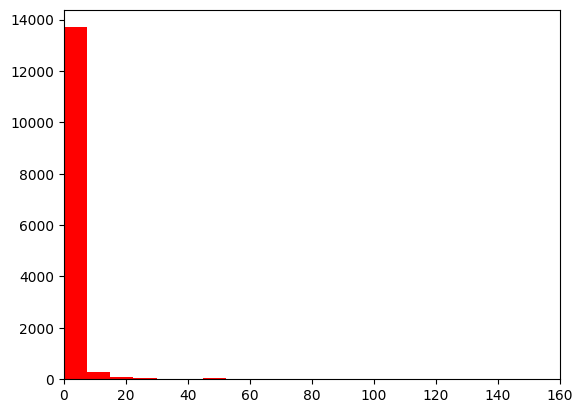

In [77]:
plt.hist(medical_data.Quantity, color = 'red', bins = 20, alpha = 1)
plt.xlim(0,160)

In [184]:
pharma_data.Final_Cost.max()

33178.0

(0.0, 3500.0)

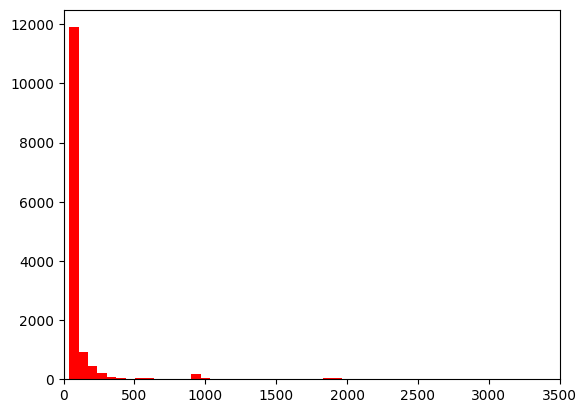

In [78]:
plt.hist(medical_data.Final_Cost, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,3500)

In [81]:
medical_data.Final_Sales.max()

39490.0

(0.0, 4000.0)

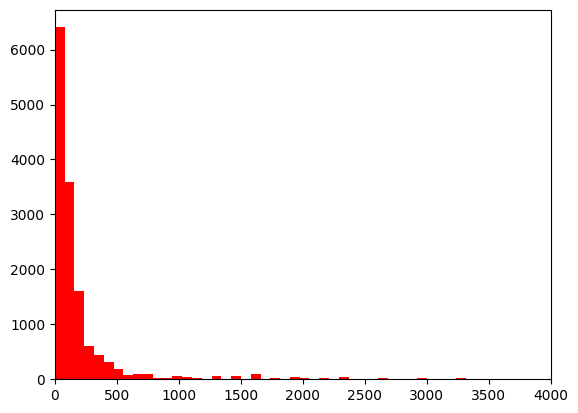

In [82]:
plt.hist(medical_data.Final_Sales, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,4000)

In [83]:
medical_data.RtnMRP.max()

8014

(0.0, 1000.0)

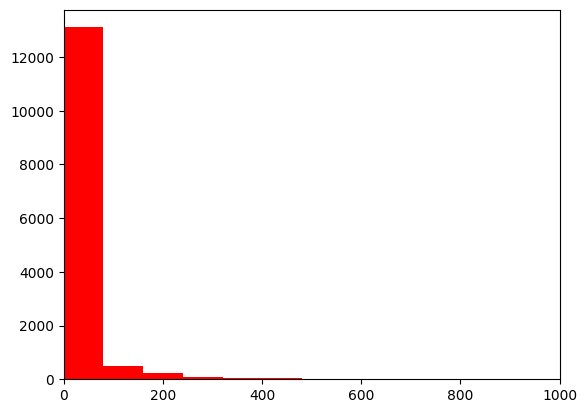

In [85]:
plt.hist(medical_data.RtnMRP, color = 'red', bins = 100, alpha = 1)
plt.xlim(0,1000)

In [86]:
# Convert date formate to month
medical_data['Dateofbill'] = pd.to_datetime(medical_data['Dateofbill'])
medical_data['Dateofbill'] = medical_data['Dateofbill'].dt.strftime('%b')
medical_data.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
7355,Sale,12018071419,Specialisation4,Department2,Jan,1,44.0,47.0,0,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
7028,Sale,12018076573,Specialisation4,Department1,Jan,1,49.0,61.0,0,Form1,,,
8866,Sale,12018050532,Specialisation4,Department1,Jan,1,41.0,41.0,0,Form1,ASPIRIN 75MG,TABLETS & CAPSULES,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7011,Sale,12018071876,Specialisation3,Department1,Jan,1,65.0,75.0,0,Form1,THYROXINE SODIUM 25MCG TAB,TABLETS & CAPSULES,ENDOCRINE & METABOLIC SYSTEM
8014,Sale,12018071419,Specialisation4,Department2,Jan,1,52.0,56.0,0,Form2,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS


In [87]:
# Pivot the DataFrame based on SubCat of drugs
data_pivoted = medical_data.pivot_table(index="SubCat", columns="Dateofbill", values="Quantity")

# Result
data_pivoted.head()

Dateofbill,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
SubCat,,,,,,,,,,,,
,6.492308,4.005988,3.714286,6.037500,4.612245,6.158228,4.285714,6.284553,6.483871,3.481707,4.690909,4.879195
DROPS,0.888889,0.666667,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.857143
INHALERS & RESPULES,2.360000,2.977778,2.722222,2.935484,3.666667,3.186047,3.266667,3.250000,4.052632,2.954545,3.088889,3.068182
INJECTIONS,1.940663,2.035889,2.046899,1.920177,1.849138,1.849153,1.769397,1.931947,1.621569,2.207865,1.972710,1.824532
"IV FLUIDS, ELECTROLYTES, TPN",1.869231,1.686833,1.600858,1.805430,1.927083,1.839844,2.050228,1.732218,1.713208,1.485207,1.622951,1.505376


((array([-3.89628607, -3.67580637, -3.55497144, ...,  3.55497144,
          3.67580637,  3.89628607]),
  array([  0,   0,   0, ..., 100, 100, 150], dtype=int64)),
 (2.6594790725475512, 2.2338641488162336, 0.51765340369671))

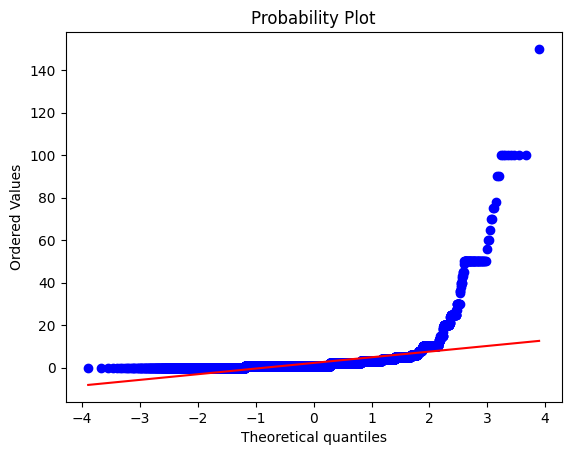

In [88]:
# Distribution of data
stats.probplot(medical_data.Quantity, dist="norm", plot=pylab)

((array([-3.89628607, -3.67580637, -3.55497144, ...,  3.55497144,
          3.67580637,  3.89628607]),
  array([      -inf,       -inf,       -inf, ..., 4.60517019, 4.60517019,
         5.01063529])),
 (nan, nan, nan))

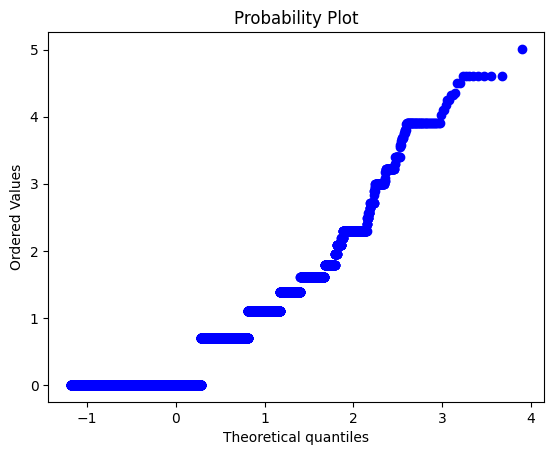

In [89]:
# Transform the data to a normal distribution
stats.probplot(np.log(medical_data.Quantity),dist="norm",plot=pylab)

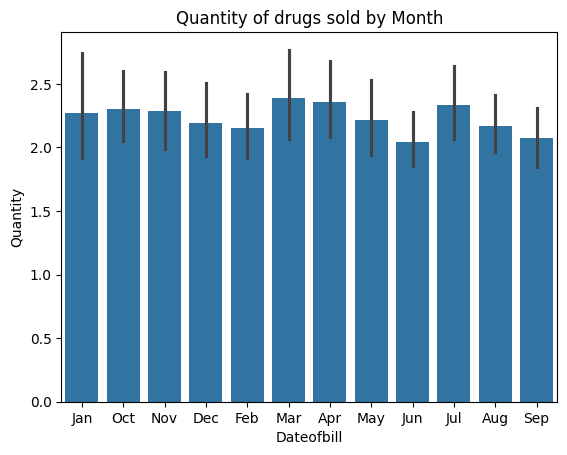

In [90]:
sns.barplot(data = medical_data, x = 'Dateofbill', y = 'Quantity')
plt.title('Quantity of drugs sold by Month')
plt.show()

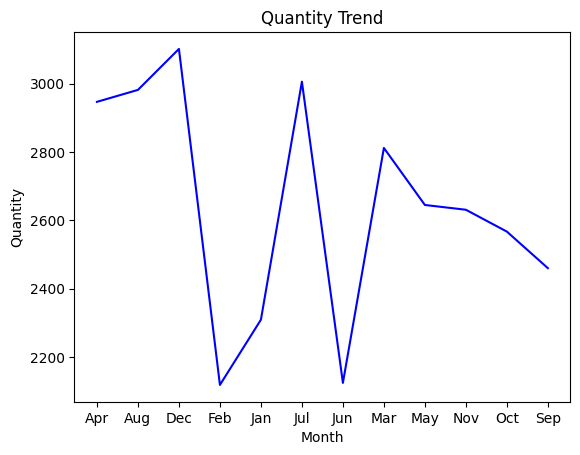

In [91]:
Month = medical_data.groupby('Dateofbill')['Quantity'].sum()
plt.plot(Month.index, Month.values, color = 'blue')
plt.title('Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

In [103]:
import dtale as dt

In [104]:
dt.show(medical_data)

In [105]:
d = dt.show(medical_data)
d.open_browser()

In [106]:
df_grouped = medical_data[['Dateofbill','Quantity']]

In [107]:
# Group by Quantity and Month
df_grouped = df_grouped.groupby('Dateofbill').sum()

# Result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped

,Dateofbill,Quantity
0,Apr,2947
1,Aug,2982
2,Dec,3102
3,Feb,2118
4,Jan,2309
5,Jul,3006
6,Jun,2124
7,Mar,2812
8,May,2645
9,Nov,2631


In [108]:
# Create dictionary to map month names into numerical values
dict_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Create a new column with the numerical values of the months
df_grouped['Monthindex'] = df_grouped['Dateofbill'].map(dict_month)

df_grouped = df_grouped.sort_values(by='Monthindex')

In [109]:
# Drop Monthindex column
df_grouped = df_grouped.drop(columns=['Monthindex'])
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,Dateofbill,Quantity
0,Jan,2309
1,Feb,2118
2,Mar,2812
3,Apr,2947
4,May,2645
5,Jun,2124
6,Jul,3006
7,Aug,2982
8,Sep,2460
9,Oct,2567


In [110]:
#One-Hot Encoding
data1 = pd.get_dummies(df_grouped.Dateofbill)
data1.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [113]:
data = pd.concat([df_grouped , data1] , axis = 1)
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,2309,False,False,False,False,True,False,False,False,False,False,False,False
1,Feb,2118,False,False,False,True,False,False,False,False,False,False,False,False
2,Mar,2812,False,False,False,False,False,False,False,True,False,False,False,False
3,Apr,2947,True,False,False,False,False,False,False,False,False,False,False,False
4,May,2645,False,False,False,False,False,False,False,False,True,False,False,False
5,Jun,2124,False,False,False,False,False,False,True,False,False,False,False,False
6,Jul,3006,False,False,False,False,False,True,False,False,False,False,False,False
7,Aug,2982,False,True,False,False,False,False,False,False,False,False,False,False
8,Sep,2460,False,False,False,False,False,False,False,False,False,False,False,True
9,Oct,2567,False,False,False,False,False,False,False,False,False,False,True,False


In [112]:
data['log_Quantity'] = np.log(data['Quantity'])
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_Quantity
0,Jan,2309,False,False,False,False,True,False,False,False,False,False,False,False,7.744570
1,Feb,2118,False,False,False,True,False,False,False,False,False,False,False,False,7.658228
2,Mar,2812,False,False,False,False,False,False,False,True,False,False,False,False,7.941651
3,Apr,2947,True,False,False,False,False,False,False,False,False,False,False,False,7.988543
4,May,2645,False,False,False,False,False,False,False,False,True,False,False,False,7.880426
5,Jun,2124,False,False,False,False,False,False,True,False,False,False,False,False,7.661056
6,Jul,3006,False,False,False,False,False,True,False,False,False,False,False,False,8.008366
7,Aug,2982,False,True,False,False,False,False,False,False,False,False,False,False,8.000349
8,Sep,2460,False,False,False,False,False,False,False,False,False,False,False,True,7.807917
9,Oct,2567,False,False,False,False,False,False,False,False,False,False,True,False,7.850493


In [114]:
data["t"] = np.arange(1,13)

data["t_square"] = data["t"] * data["t"]
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,Jan,2309,False,False,False,False,True,False,False,False,False,False,False,False,1,1
1,Feb,2118,False,False,False,True,False,False,False,False,False,False,False,False,2,4
2,Mar,2812,False,False,False,False,False,False,False,True,False,False,False,False,3,9
3,Apr,2947,True,False,False,False,False,False,False,False,False,False,False,False,4,16
4,May,2645,False,False,False,False,False,False,False,False,True,False,False,False,5,25
5,Jun,2124,False,False,False,False,False,False,True,False,False,False,False,False,6,36
6,Jul,3006,False,False,False,False,False,True,False,False,False,False,False,False,7,49
7,Aug,2982,False,True,False,False,False,False,False,False,False,False,False,False,8,64
8,Sep,2460,False,False,False,False,False,False,False,False,False,False,False,True,9,81
9,Oct,2567,False,False,False,False,False,False,False,False,False,False,True,False,10,100


In [115]:
# Data Partition
Train = data
Test = data

In [116]:
import statsmodels.formula.api as smf

linear = smf.ols('Quantity ~ t', data = Train).fit()
pickle.dump(linear,open('linear_model.pkl','wb'))

In [117]:
pred_linear =  pd.Series(linear.predict(pd.DataFrame(Test['t'])))
mape_linear = np.mean(np.abs((Test['Quantity'] - (pred_linear)) / Test['Quantity'])) * 100
mape_linear

10.62082133401469

In [120]:

Exponential = smf.ols('Quantity ~ t', data=Train).fit()
pred_Exponential = pd.Series(Exponential.predict(pd.DataFrame(Test['t'])))

In [121]:
mape_Exponential = np.mean(np.abs((Test['Quantity'] - np.exp(pred_Exponential)) / Test['Quantity'])) * 100
mape_Exponential

inf

In [122]:
Quadratic = smf.ols('Quantity ~ t + t_square', data = Train).fit()
pred_Quadratic = pd.Series(Quadratic.predict(Test[["t", "t_square"]]))

In [123]:
mape_Quadratic = np.mean(np.abs((Test['Quantity'] - (pred_Quadratic)) / Test['Quantity'])) * 100
mape_Quadratic

10.242427282635514

In [124]:
addSeasonality = smf.ols('Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_addSeasonality = pd.Series(addSeasonality.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [125]:
mape_addSeasonality = np.mean(np.abs((Test['Quantity'] - (pred_addSeasonality)) / Test['Quantity'])) * 100
mape_addSeasonality

2.8670418307480026e-14

In [127]:
MulSeasonality = smf.ols('Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonality = pd.Series(MulSeasonality.predict(Test))
mape_MultSeasonality = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonality)) / Test['Quantity'])) * 100
mape_MultSeasonality

inf

In [128]:
add_seaQuadratic = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_seaQuadratic = pd.Series(add_seaQuadratic.predict(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov' , 'Oct' , 'Sep' ,'t','t_square']]))
mape_add_seaQuadratic = np.mean(np.abs((Test['Quantity'] - (pred_add_seaQuadratic)) / Test['Quantity'])) * 100
mape_add_seaQuadratic

1.2453316723380688e-12

In [130]:
Mul_SeasonalityLinear = smf.ols('Quantity ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonalityLinear = pd.Series(Mul_SeasonalityLinear.predict(Test))

In [131]:
mape_MultSeasonalityLinear = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonalityLinear)) / Test['Quantity'])) * 100
mape_MultSeasonalityLinear

inf

In [132]:
data1 = {"MODEL":pd.Series(["mape_linear","mape_Exponential","mape_Quadratic","mape_addSeasonality","mape_MultSeasonality","mape_add_seaQuadratic","mape_MultSeasonalityLinear"]),"MAPE_Values":pd.Series([mape_linear,mape_Exponential,mape_Quadratic,mape_addSeasonality,mape_MultSeasonality,mape_add_seaQuadratic,mape_MultSeasonalityLinear])}
table_mape = pd.DataFrame(data1)
table_mape

,MODEL,MAPE_Values
0,mape_linear,1.062082e+01
1,mape_Exponential,inf
2,mape_Quadratic,1.024243e+01
3,mape_addSeasonality,2.867042e-14
4,mape_MultSeasonality,inf
5,mape_add_seaQuadratic,1.245332e-12
6,mape_MultSeasonalityLinear,inf


In [133]:
model_full = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [134]:
predict_data = data
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     2309.0
1     2118.0
2     2812.0
3     2947.0
4     2645.0
5     2124.0
6     3006.0
7     2982.0
8     2460.0
9     2567.0
10    2631.0
11    3102.0
dtype: float64

In [135]:
predict_data["forecasted_Quantity"] = pd.Series(pred_new)

In [136]:
model_full.save("model.pickle")

In [137]:
# Load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

In [138]:
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = data.Quantity - model_full.predict(data)

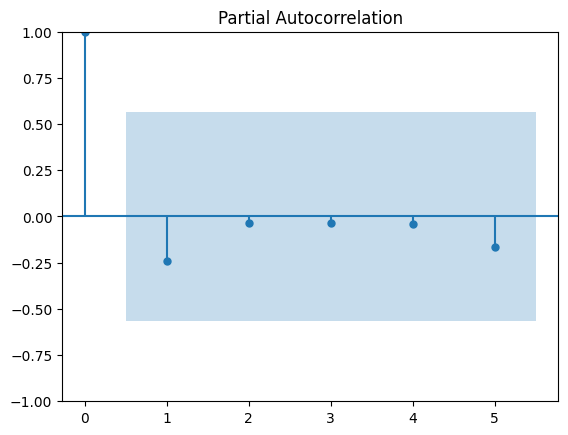

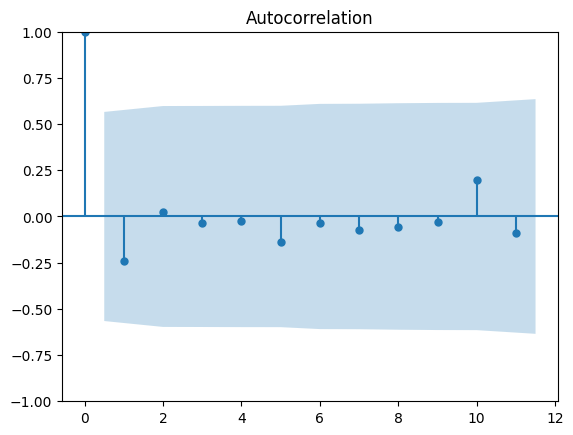

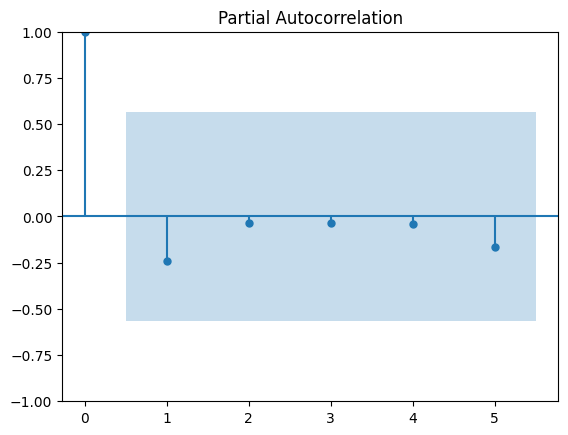

In [139]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [140]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])

# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

print('Coefficients: %s' % model_fit.params)

pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

Coefficients: const    4.131672e-11
y.L1    -2.567987e-01
dtype: float64


0     2309.0
1     2118.0
2     2812.0
3     2947.0
4     2645.0
5     2124.0
6     3006.0
7     2982.0
8     2460.0
9     2567.0
10    2631.0
11    3102.0
dtype: float64

In [141]:
train = df_grouped
test= df_grouped
train

,Dateofbill,Quantity
0,Jan,2309
1,Feb,2118
2,Mar,2812
3,Apr,2947
4,May,2645
5,Jun,2124
6,Jul,3006
7,Aug,2982
8,Sep,2460
9,Oct,2567


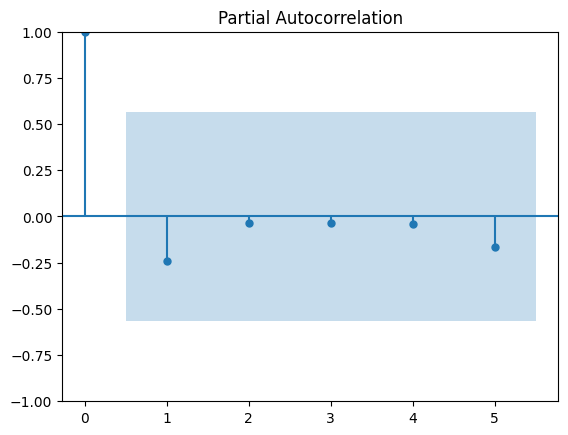

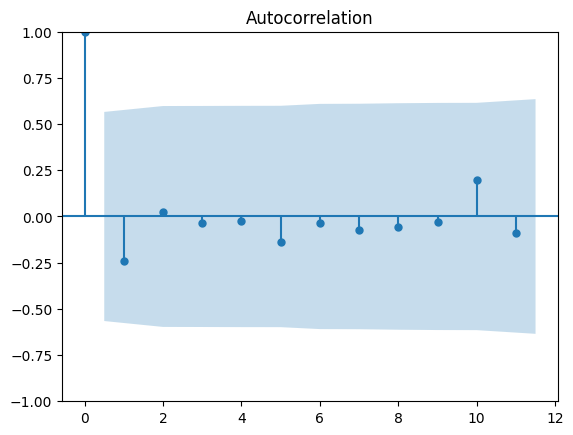

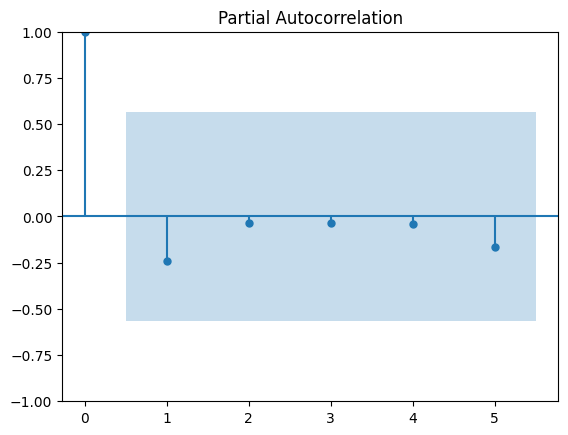

In [142]:
tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [143]:
model1 = ARIMA(train.Quantity, order = (5,1,2))
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 -97.908
Date:                Tue, 17 Oct 2023   AIC                            211.816
Time:                        05:14:29   BIC                            214.999
Sample:                             0   HQIC                           209.809
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7548      0.025    -29.630      0.000      -0.805      -0.705
ar.L2         -0.3270      0.026    -12.564      0.000      -0.378      -0.276
ar.L3          0.3242      0.026     12.497      0.000       0.273       0.375
ar.L4          0.7529      0.026     29.408      0.000       0.703       0.803
ar.L5          0.9993   6.08e-05   1.64e+04      0.000       0.999       0.999
ma.L1          0.0011      0.120      0.010      0.992      -0.234       0.236
ma.L2         -0.9989      0.194     -5.144      0.000      -1.379      -0.618
sigma2      2976.1945   8.17e-05   3.64e+07      0.000    2976.194    2976.195
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.25   Prob(JB):                         0.64
Heteroskedasticity (H):               0.70   Skew:                             0.28
Prob(H) (two-sided):                  0.73   Kurtosis:                         1.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+23. Standard errors may be unstable.
"""

In [144]:
start_index = len(train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [145]:
forecast_test = pd.DataFrame(forecast_test)
forecast_test

,predicted_mean
12,2413.095463
13,2423.023743
14,2948.615042
15,2743.816137
16,2681.776364
17,2285.053800
18,2944.014050
19,2927.245081
20,2344.439384
21,2642.832756


In [146]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_test = sqrt(mean_squared_error(test.Quantity, forecast_test))

print('test RMSE: %.3f' % rmse_test)

test RMSE: 138.270


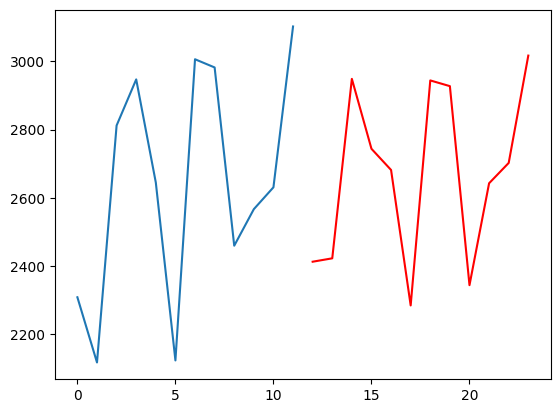

In [147]:
plt.plot(test.Quantity)
plt.plot(forecast_test, color = 'red')
plt.show()

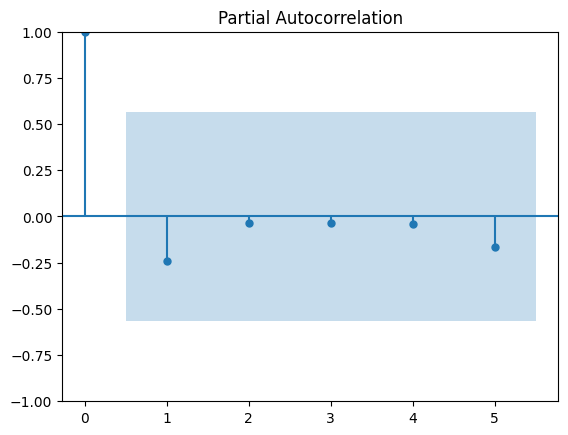

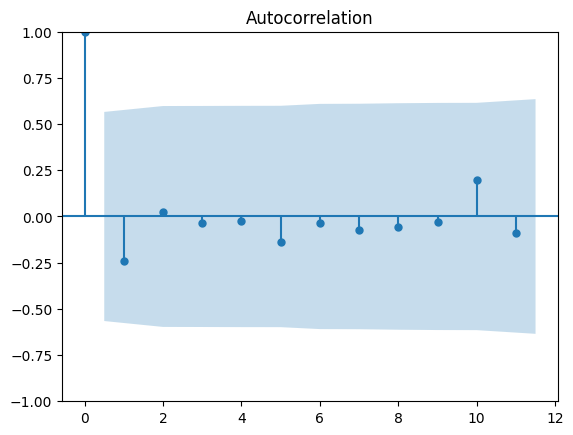

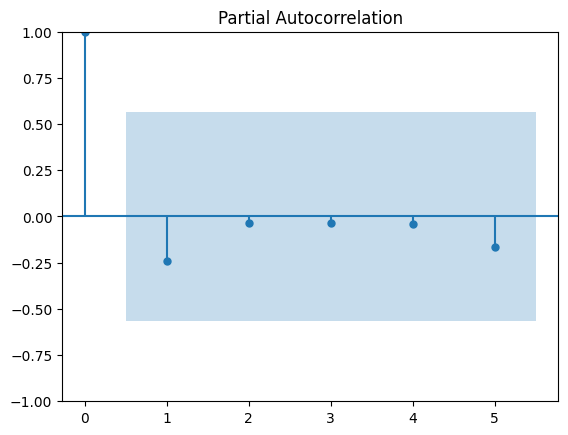

In [148]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [150]:
import pmdarima as pm
# help(pm.auto_arima)

ar_model = pm.auto_arima(train.Quantity, start_p = 0, start_q = 0,
                      max_p = 16, max_q = 16, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

# Print model summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=225.338, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.008, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=186.517, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=187.828, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 2.267 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                nan
Time:                        05:20:15   Log-Likelihood:                 269.38
No. Observations:                  12   AIC:                            -514.8
Df Residuals:                       0   BIC:                            -508.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1178.6264        inf          0        nan         nan         nan
Jan[T.True]   730.7530        inf          0        nan         nan         nan
Feb[T.True]   191.8441        inf          0        nan         nan         nan
Mar[T.True]   589.6469        inf          0        nan         nan         nan
Apr[T.True]   480.1615        inf          0        nan         nan         nan
May[T.True]   -14.6123        inf         -0        nan         nan         nan
Jun[T.True]  -676.6743        inf         -0        nan         nan         nan
Jul[T.True]   115.9754        inf          0        nan         nan         nan
Aug[T.True]    54.3368        inf          0        nan         nan         nan
Sep[T.True]  -453.5901        inf         -0        nan         nan         nan
Oct[T.True]  -280.8053        inf         -0        nan         nan         nan
Nov[T.True]   -99.3087        inf         -0        nan         nan         nan
Dec[T.True]   540.8995        inf          0        nan         nan         nan
t             425.4765        inf          0        nan         nan         nan
t_square      -25.8559        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        9.839   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                5.070
Skew:                           1.396   Prob(JB):                       0.0793
Kurtosis:                       4.530   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [151]:
# Predictions on test set
predictions =ar_model.predict(n_periods=len(test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test.Quantity, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 328.414


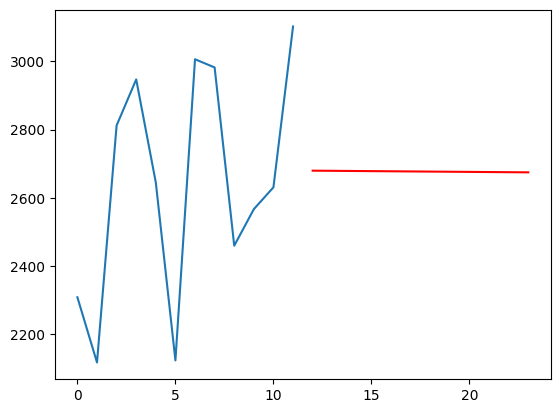

In [152]:
# Plot predictions against actual values
plt.plot(test.Quantity)
plt.plot(predictions, color='red')
plt.show()

In [157]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(test.Quantity, forecast))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 227.642


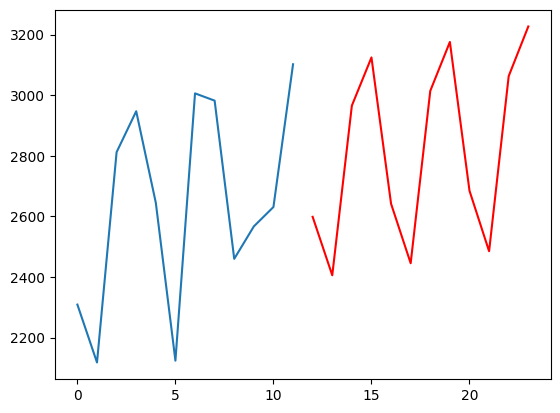

In [159]:
# Plot forecasts against actual outcomes
pyplot.plot(test.Quantity)
pyplot.plot(forecast, color = 'red')
pyplot.show()

In [160]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='mul')
model_fit = model.fit()

In [161]:
# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2598.630655
13    2405.752035
14    2965.454671
15    3124.505189
16    2641.656383
17    2445.420060
18    3014.150799
19    3175.603334
20    2684.682110
21    2485.088084
22    3062.846926
23    3226.701479
dtype: float64

In [162]:
# Prepare train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

In [163]:
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

MAPE: nan


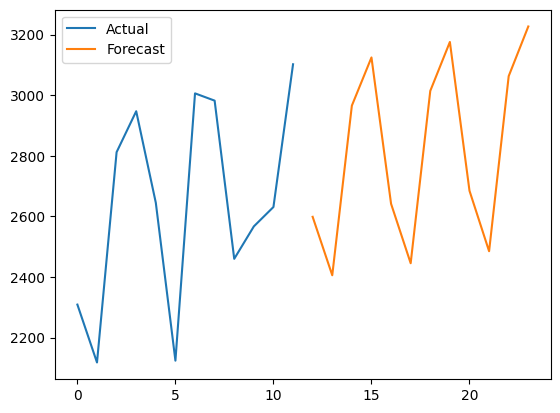

In [164]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='add')
model_fit = model.fit()

In [166]:
# Forecast for next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12     2818.941784
13     3054.448636
14     4223.564234
15     4898.221204
16     4864.746269
17     5379.196144
18     6865.288316
19     7900.141242
20     8275.974555
21     9255.541374
22    11270.168637
23    12905.621787
dtype: float64

In [167]:
# Prepare train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

In [168]:
# Calculate root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 5089.621220973428


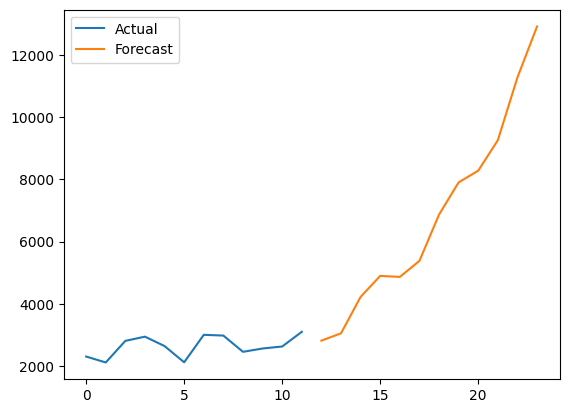

In [169]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [170]:
#Random Forest & Linear Regression Model
df = data[['Dateofbill', 'Quantity']]


In [171]:
df.index.freq = 'MS'

In [172]:
df.head(10)

,Dateofbill,Quantity
0,Jan,2309
1,Feb,2118
2,Mar,2812
3,Apr,2947
4,May,2645
5,Jun,2124
6,Jul,3006
7,Aug,2982
8,Sep,2460
9,Oct,2567


In [173]:
df.set_index('Dateofbill')

,Quantity
Dateofbill,
Jan,2309
Feb,2118
Mar,2812
Apr,2947
May,2645
Jun,2124
Jul,3006
Aug,2982
Sep,2460


<Axes: >

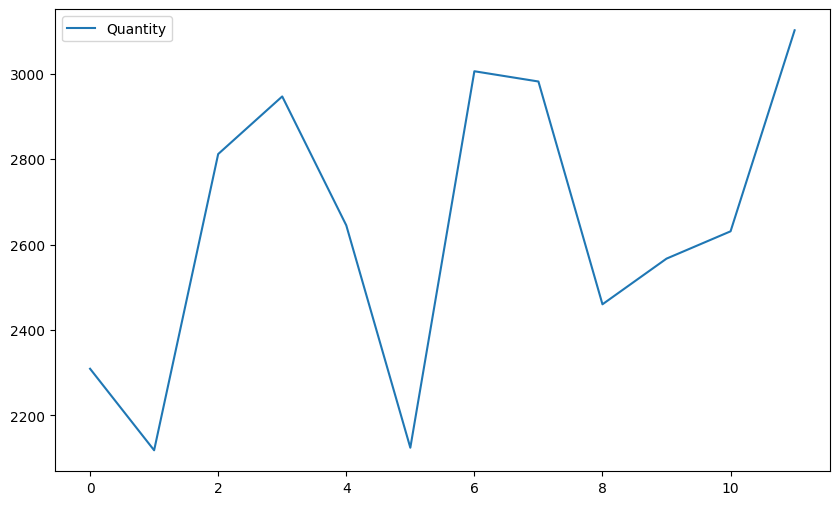

In [174]:
df.plot(figsize=(10,6))

In [175]:
df['Quantity_LastMonth']=df['Quantity'].shift(+1)
df['Quantity_2Monthsback']=df['Quantity'].shift(+2)
df['Quantity_3Monthsback']=df['Quantity'].shift(+3)
df

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
0,Jan,2309,NaN,NaN,NaN
1,Feb,2118,2309.0,NaN,NaN
2,Mar,2812,2118.0,2309.0,NaN
3,Apr,2947,2812.0,2118.0,2309.0
4,May,2645,2947.0,2812.0,2118.0
5,Jun,2124,2645.0,2947.0,2812.0
6,Jul,3006,2124.0,2645.0,2947.0
7,Aug,2982,3006.0,2124.0,2645.0
8,Sep,2460,2982.0,3006.0,2124.0
9,Oct,2567,2460.0,2982.0,3006.0


In [176]:
df = df.dropna()
df

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
3,Apr,2947,2812.0,2118.0,2309.0
4,May,2645,2947.0,2812.0,2118.0
5,Jun,2124,2645.0,2947.0,2812.0
6,Jul,3006,2124.0,2645.0,2947.0
7,Aug,2982,3006.0,2124.0,2645.0
8,Sep,2460,2982.0,3006.0,2124.0
9,Oct,2567,2460.0,2982.0,3006.0
10,Nov,2631,2567.0,2460.0,2982.0
11,Dec,3102,2631.0,2567.0,2460.0


In [177]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [178]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [179]:
import numpy as np
x1,x2,x3,y=df['Quantity_LastMonth'],df['Quantity_2Monthsback'],df['Quantity_3Monthsback'],df['Quantity']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[2812. 2118. 2309.]
 [2947. 2812. 2118.]
 [2645. 2947. 2812.]
 [2124. 2645. 2947.]
 [3006. 2124. 2645.]
 [2982. 3006. 2124.]
 [2460. 2982. 3006.]
 [2567. 2460. 2982.]
 [2631. 2567. 2460.]]


In [180]:
X_train,X_test,y_train,y_test=final_x[:],final_x[-10:],y[:],y[-10:]

In [181]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

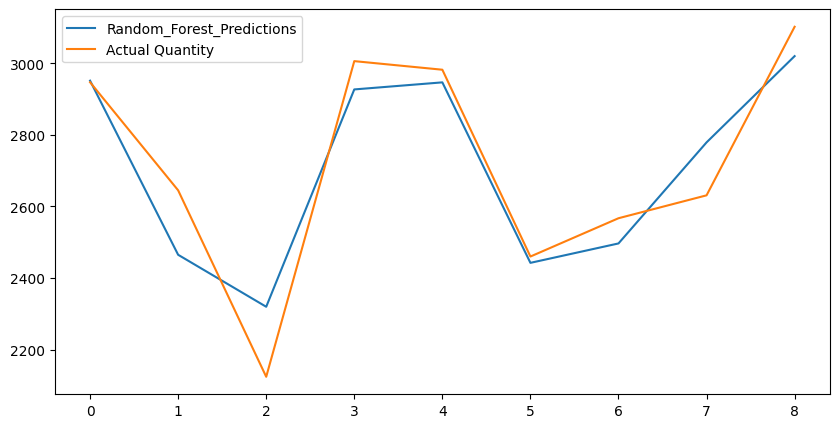

In [182]:
#Random Forest Regression
pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(pred, label='Random_Forest_Predictions')
plt.plot(y_test, label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

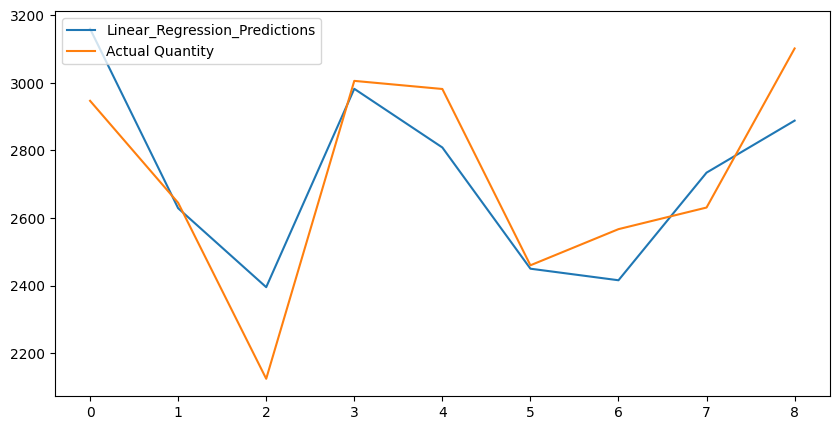

In [183]:
lin_pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(lin_pred, label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show() 